# 課題9 
配点
- Q1.1 1P
- Q1.2 2P
- Q2.1 2P
- Q2.2 2P
- Q3 3P


In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot  as plt
%matplotlib inline

## Q1.1 多項式による線形回帰
`scikit-learn`モジュールの`PolynomialFeatures`クラスを使うと入力の特徴量から多項や交差項の特徴量を生成することができます。多項や交差項の特徴量を導入にすることによりモデルが複雑になり、訓練データへのより柔軟な適合が可能になります。

例えば、多項式の次数としてパラメータ`degree`に2を指定すると、1変数の入力$x$に対して、1（バイアス項), $x$, $x^2$、の3つの特徴量を生成します。2変数入力$x_1, x_2$の場合は、1, $x_1$, $x_2$, $x_1^2$, $x_1x_2$, $x_2^2$、の特徴量が生成されます。バイアス項を生成しない場合はパラメータ`include_bias`に`False`を指定します。

[PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures)

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import PolynomialFeatures

iris = load_iris() 
X=(iris['data'][:,2])[:,np.newaxis] 
y=(iris['data'][:,3])[:,np.newaxis] 

print(PolynomialFeatures(degree=2).fit_transform(X)) # 1, x, x^2、の特徴量

[[ 1.    1.4   1.96]
 [ 1.    1.4   1.96]
 [ 1.    1.3   1.69]
 [ 1.    1.5   2.25]
 [ 1.    1.4   1.96]
 [ 1.    1.7   2.89]
 [ 1.    1.4   1.96]
 [ 1.    1.5   2.25]
 [ 1.    1.4   1.96]
 [ 1.    1.5   2.25]
 [ 1.    1.5   2.25]
 [ 1.    1.6   2.56]
 [ 1.    1.4   1.96]
 [ 1.    1.1   1.21]
 [ 1.    1.2   1.44]
 [ 1.    1.5   2.25]
 [ 1.    1.3   1.69]
 [ 1.    1.4   1.96]
 [ 1.    1.7   2.89]
 [ 1.    1.5   2.25]
 [ 1.    1.7   2.89]
 [ 1.    1.5   2.25]
 [ 1.    1.    1.  ]
 [ 1.    1.7   2.89]
 [ 1.    1.9   3.61]
 [ 1.    1.6   2.56]
 [ 1.    1.6   2.56]
 [ 1.    1.5   2.25]
 [ 1.    1.4   1.96]
 [ 1.    1.6   2.56]
 [ 1.    1.6   2.56]
 [ 1.    1.5   2.25]
 [ 1.    1.5   2.25]
 [ 1.    1.4   1.96]
 [ 1.    1.5   2.25]
 [ 1.    1.2   1.44]
 [ 1.    1.3   1.69]
 [ 1.    1.4   1.96]
 [ 1.    1.3   1.69]
 [ 1.    1.5   2.25]
 [ 1.    1.3   1.69]
 [ 1.    1.3   1.69]
 [ 1.    1.3   1.69]
 [ 1.    1.6   2.56]
 [ 1.    1.9   3.61]
 [ 1.    1.4   1.96]
 [ 1.    1.6   2.56]
 [ 1.    1.4 

以下の関数`iris_poly_regression()`では、課題8で用いたirisデータセットの特徴量`petal_length`から引数`n`の次数の多項式の特徴量を生成し、それらの特徴量を用いて線形回帰（`LinearRegression`）により特徴量`petal_width`を予測するモデルを学習しています。

[LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

データセットは`tran_test_split`関数を使って、70%をモデル学習の訓練データ、30%をモデル評価のテストデータに分割しています。

[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

モデル評価は平均二乗誤差（`mean_squared_error`）で行います。

[mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)


In [3]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

def iris_poly_regression(n):
    # 引数 n: 多項式の次数 

    iris = load_iris() 
    X=(iris['data'][:,2])[:,np.newaxis] 
    y=(iris['data'][:,3])[:,np.newaxis] 

    # 訓練データとテストデータに分割
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # 入力からn次多項式の特徴量を生成
    poly=PolynomialFeatures(degree=n, include_bias=False)
    poly_X_train=poly.fit_transform(X_train)
    poly_X_test=poly.fit_transform(X_test)

    # 訓練データへ適合
    model=LinearRegression(normalize=True) # normalize=Trueで各特徴量を標準化
    model.fit(poly_X_train, y_train) 

    # 訓練データ誤差
    y_predicted_train=model.predict(poly_X_train)
    train_loss =mean_squared_error(y_train,y_predicted_train)
    print(train_loss)

    # テストデータ誤差
    y_predicted_test=model.predict(poly_X_test) 
    test_loss = mean_squared_error(y_test,y_predicted_test)
    print(test_loss)

    #パラメータ
    #print(model.intercept_)
    #print(model.coef_)

    # 曲線描画用のデータポイント
    X_point=np.arange(X.min(),X.max(),0.1)[:,np.newaxis]
    y_point=model.predict(poly.fit_transform(X_point))

    plt.figure(figsize=(7,5))
    plt.xlabel(iris["feature_names"][2])
    plt.ylabel(iris["feature_names"][3])
    plt.scatter(poly_X_train[:,0], y_train,c='blue') # 訓練データ
    plt.scatter(poly_X_test[:,0], y_test,c='green') # テストデータ
    plt.plot(X_point, y_point, color='red');
    
    return train_loss, test_loss

多項式の次数$n$を変化させて、入力（petal_lengthの値）と出力（入力から予測されたpetal_widthの値）の対応がどのように変化するか、特に次数が大きくなり学習モデルが複雑になると訓練データ（青のデータポイント）に適合しすぎてしまう過学習が起こることを観察してください。

0.03727130781245481
0.05335352448031871


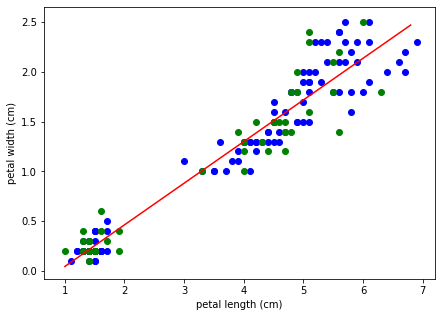

In [4]:
train_loss, test_loss = iris_poly_regression(1)

0.03168430390802144
0.05057567023552101


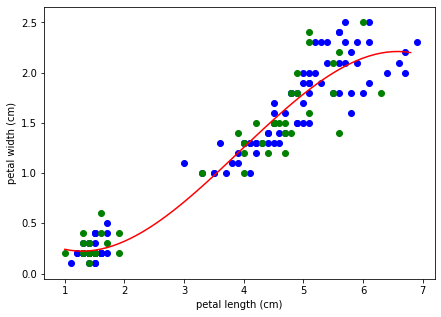

In [5]:
train_loss, test_loss = iris_poly_regression(3)

0.025692542143382593
0.05177907632430684


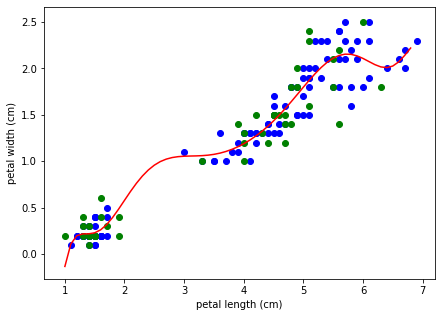

In [6]:
train_loss, test_loss = iris_poly_regression(10)

多項式の次数を1から10まで変化させた時の訓練データとテストデータの誤差の変化をプロットする以下の処理を完成させてください。

完成したらセルを実行し、多項式の次数が大きくなると、訓練データとテストデータの誤差はそれぞれどのように変化するか観察してください。特に、次数が大きくなると訓練データの誤差が減少していきますが、テストデータの誤差は必ずしも減少しないことも確認してください。

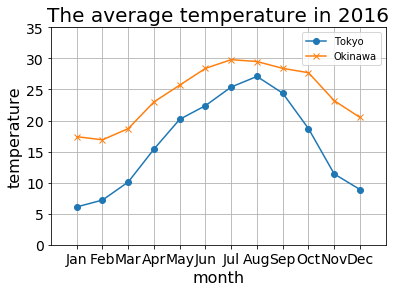

In [7]:
import matplotlib.pyplot as plt

x_datas = range(1, 13)
tokyo =  [6.1, 7.2, 10.1, 15.4, 20.2, 22.4, 25.4, 27.1, 24.4, 18.7, 11.4, 8.9]

#沖縄の平均気温を追加
okinawa = [17.4, 16.9, 18.7, 23.0, 25.7, 28.4, 29.8, 29.5, 28.4, 27.7, 23.2, 20.5]

months = ['Jan', 'Feb', 'Mar', 'Apr', 
    'May', 'Jun','Jul', 'Aug', 
    'Sep', 'Oct', 'Nov', 'Dec']

plt.plot(x_datas, tokyo, marker = 'o', label = 'Tokyo')
plt.plot(x_datas, okinawa, marker = 'x', label = 'Okinawa')

plt.xticks(x_datas, months)
plt.xlim(0, 13)
plt.ylim(0, 35) #y軸の最大値を変更30→35

plt.title('The average temperature in 2016', fontsize = 20)
plt.xlabel('month', fontsize = 16)
plt.ylabel('temperature', fontsize = 16)
plt.tick_params(labelsize=14)
plt.grid(True)
plt.legend(loc = 'upper right')
plt.show()

In [8]:
degree=np.arange(1,11) # 次数(1から10)
train_curve=[] # 各次数の訓練データ誤差のリスト
test_curve=[] # 各次数のテストデータ誤差のリスト

iris = load_iris() 
X=(iris['data'][:,2])[:,np.newaxis] 
y=(iris['data'][:,3])[:,np.newaxis] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
print(X_train.ndim==y_train.ndim) #ともに２

# ValueError: x and y can be no greater than 2-D, but have shapes (10,) and (10, 105, 1)


print(X_train.shape)
print(y_train.shape)
print(len(train_curve))
print(len(test_curve))

True
(105, 1)
(105, 1)
0
0


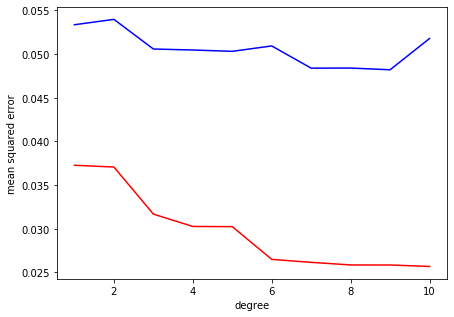

In [10]:
for n in degree:
    # 入力からn次多項式の特徴量を生成
    poly=PolynomialFeatures(degree=n, include_bias=False)
    poly_X_train=poly.fit_transform(X_train)
    poly_X_test=poly.fit_transform(X_test)

    # 訓練データへ適合
    model=LinearRegression(normalize=True) # normalize=Trueで各特徴量を標準化
    model.fit(poly_X_train, y_train) 

    # 訓練データ誤差
    y_predicted_train=model.predict(poly_X_train)
    train_loss =mean_squared_error(y_train,y_predicted_train)
    ### 訓練データの誤差を計算するコード ###
    ### train_curve(list)にtrain_lossを追加するコード ###
    train_curve.append(train_loss)
    
    # テストデータ誤差
    y_predicted_test=model.predict(poly_X_test)
    test_loss = mean_squared_error(y_test,y_predicted_test)
    ### テストデータの誤差を計算するコード ###
    ### test_curve(list)にtest_lossを追加するコード ###
    test_curve.append(test_loss)
    
plt.figure(figsize=(7,5))
plt.xlabel('degree')
plt.ylabel('mean squared error')    

plt.plot(degree, train_curve, color='red'); # 訓練データ誤差曲線
plt.plot(degree, test_curve, color='blue'); # テストデータ誤差曲線

## Q1.2 正則化
以下では、学習モデルとして`LinearRegression`の代わりに`Ridge`（リッジ回帰）を使っています。`Ridge`クラスは、$L_2$ノルムを正則化に用いた線形回帰モデルで学習を行うことができます。パラメータ`alpha`に正則化項の係数（講義資料中の$\lambda$）を指定します。

[Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

Q1.1で観察した過学習が、正則化により抑えられていることを観察してください。また、正則化項の係数のハイパーパラメータを変化させた時（例えば、0.01, 0.1, 1, 10など）、入力（`petal_length`の値）と出力（入力から予測された`petal_width`の値）の対応がどのように変化するかその時の誤差の値とともに観察してください。正則化項の係数を大きするとアンダーフィッティングが起こることを確認してください。

In [11]:
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def iris_poly_ridge(n, a):
    # 引数 n: 多項式の次数 
    # 引数 a: 正則化項の係数

    iris = load_iris() 
    X=(iris['data'][:,2])[:,np.newaxis] 
    y=(iris['data'][:,3])[:,np.newaxis] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # 入力からn次多項式の特徴量を生成
    poly=PolynomialFeatures(degree=n, include_bias=False)
    poly_X_train=poly.fit_transform(X_train)
    poly_X_test=poly.fit_transform(X_test)

    # 訓練データへ適合
    # リッジ回帰モデル（aは正則化項の係数）
    model=Ridge(alpha=a, normalize=True)
    model.fit(poly_X_train, y_train) 

    # 訓練データ誤差
    y_predicted_train=model.predict(poly_X_train)
    train_loss =mean_squared_error(y_train,y_predicted_train)
    print(train_loss)

    # テストデータ誤差
    y_predicted_test=model.predict(poly_X_test) 
    test_loss = mean_squared_error(y_test,y_predicted_test)
    print(test_loss)

    #パラメータ
    #print(model.intercept_)
    #print(model.coef_)

    # 曲線描画用のデータポイント
    X_point=np.arange(X.min(),X.max(),0.1)[:,np.newaxis]
    y_point=model.predict(poly.fit_transform(X_point))

    plt.figure(figsize=(7,5))
    plt.xlabel(iris["feature_names"][2])
    plt.ylabel(iris["feature_names"][3])
    plt.scatter(poly_X_train[:,0], y_train,c='blue') # 訓練データ
    plt.scatter(poly_X_test[:,0], y_test,c='green') # テストデータ
    plt.plot(X_point, y_point, color='red');
    
    return train_loss, test_loss

0.03732674254335568
0.05314635132763728


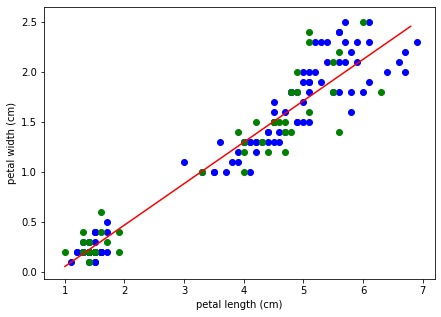

In [12]:
train_loss, test_loss = iris_poly_ridge(1, 0.01)

0.03653864159211502
0.052648737192171516


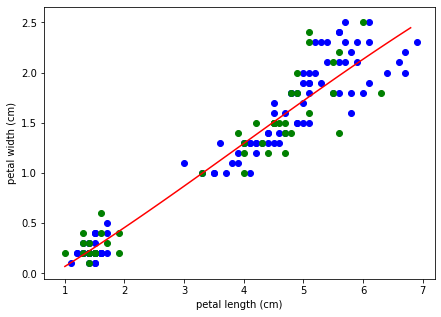

In [13]:
train_loss, test_loss = iris_poly_ridge(3, 0.01)

0.03058712377586999
0.04999172173970824


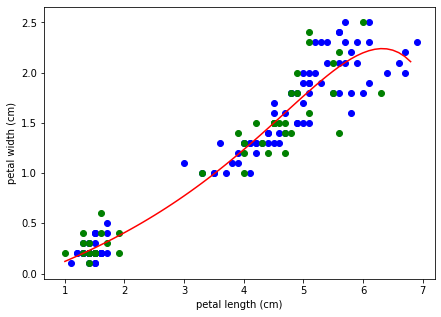

In [14]:
train_loss, test_loss = iris_poly_ridge(10, 0.01)

Q1.1を参考に、上記のリッジ回帰で多項式の次数を1から10まで変化させた時の訓練データとテストデータの誤差の変化をプロットする以下の処理を完成させてください。その際、正則化項の係数は0.01など適当な値に固定してください。

完成したらセルを実行し、多項式の次数が大きくなると、訓練データとテストデータの誤差はそれぞれどのように変化するか観察してください。

In [15]:
degree=np.arange(1,11) # 次数(1から10)
train_curve=[] # 各次数の訓練データ誤差のリスト
test_curve=[] # 各次数のテストデータ誤差のリスト

iris = load_iris() 
X=(iris['data'][:,2])[:,np.newaxis] 
y=(iris['data'][:,3])[:,np.newaxis] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

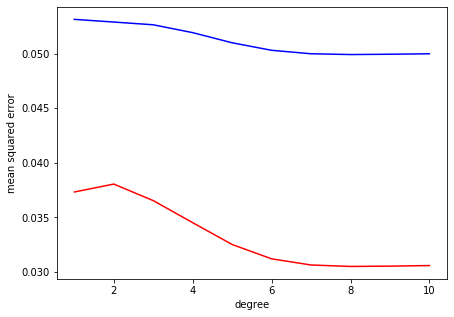

In [16]:
### 上記のリッジ回帰で多項式の次数を1から10まで変化させた時の訓練データとテストデータの誤差の変化曲線を表示するコード ###

for n in degree:
    # 入力からn次多項式の特徴量を生成
    poly=PolynomialFeatures(degree=n, include_bias=False)
    poly_X_train=poly.fit_transform(X_train)
    poly_X_test=poly.fit_transform(X_test)

    # 訓練データへ適合
    model=Ridge(alpha=0.01, normalize=True)
    model.fit(poly_X_train, y_train) 

    # 訓練データ誤差
    y_predicted_train=model.predict(poly_X_train)
    train_loss =mean_squared_error(y_train,y_predicted_train)
    train_curve.append(train_loss)
    
    # テストデータ誤差
    y_predicted_test=model.predict(poly_X_test) 
    test_loss = mean_squared_error(y_test,y_predicted_test)
    test_curve.append(test_loss)
    
plt.figure(figsize=(7,5))
plt.xlabel('degree')
plt.ylabel('mean squared error')    

plt.plot(degree, train_curve, color='red'); # 訓練データ誤差曲線
plt.plot(degree, test_curve, color='blue'); # テストデータ誤差曲線

### Q2 ロジスティック回帰

irisデータセットの特徴量`petal_length`と`petal_width`で2つの花の種類`versicolor`か`virginica`のデータを散布図で可視化すると以下のように花ごとに`petal_length`と`petal_width`の特徴が異なることがわかります。

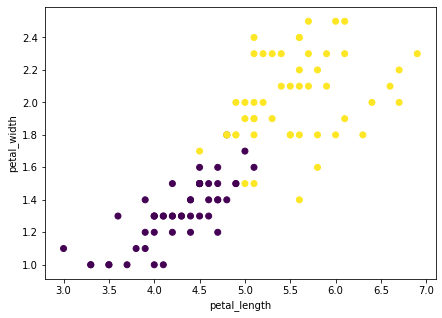

In [17]:
from sklearn.datasets import load_iris
iris = load_iris()
X_all = iris.data[:,[2,3]] # 特徴量petal_lengthとpetal_width
y_all = iris.target # 花の種類

X = X_all[(y_all==1)|(y_all==2)] # 花の種類versicolorかvirginicaに対応する入力
y_label = y_all[(y_all==1)|(y_all==2)]-1 # 花の種類versicolorかvirginica（ラベルを0or1にする）

plt.figure(figsize=(7,5))
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.scatter(X[:,0], X[:,1], c=y_label);

以下では、ロジスティック回帰により特徴量`petal_length`と`petal_width`から2つの花の種類`versicolor`か`virginica`を予測するような仮説関数のパラメータを学習することを考えます。

まず準備として、特徴量`petal_length`と`petal_width`を入力$X$, 花の種類`versicolor`か`virginica`を出力（ラベル）$y$とします。入力$X$は各特徴量ごとに標準化し、入力の各データにバイアス項($x_0=1$)を追加するため、入力の先頭列に1を要素とする列ベクトルを挿入します。これにより、入力$X$と出力$y$はデータ数を$m$としてそれぞれ行列（$m \times 3$) とベクトル($m \times 1$)になります。

In [18]:
y
type(y) #numpy.ndarray
y.shape #(100, 1)
y[0]

array([0.2])

In [19]:
y=y_label[:,np.newaxis] # 列ベクトルにする
X_norm=(X-np.mean(X, axis=0))/np.std(X, axis=0) # 標準化
X_norm=np.insert(X_norm, 0, np.ones((1,X.shape[0]), dtype=int), axis=1) # バイアス項の追加

### Q2.1 シグモイド関数
シグモイド関数$g(z)$は以下のように定義されます

$g(z)=\frac{1}{1+e^{-z}}$

引数に`NumPy`の実数値を要素とする任意の長さの配列を入力として受け取り、配列の各要素に対するシグモイド関数の値を要素とする配列を返す`sigmoid`関数を完成させてください。

[NumPyの指数関数](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html)

In [21]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z)) 
### 配列Zの各要素に対するシグモイド関数の値を計算しそれら要素とする配列を返すコード ###

`sigmoid`関数は入力の配列`[-1,0,1]`に対しては、配列`[0.26894142, 0.5, 0.73105858]`を返します。

### Q2.2 コスト関数とパラメータの推定

以下では、最急降下法により、訓練データセットを元にロジスティック回帰の仮説関数のパラメータを学習する`graddes_logit`関数を実装します。

`graddes_logit`関数では第1引数に入力のデータ行列（データ数($m$)$\times$(特徴量+バイアス)($n$))、第2引数に入力の各データに対する出力（正解）のベクトル（$m\times1$）、第3引数に学習率、第4引数に学習の繰り返し（各繰り返しをエポックと呼ぶ）の回数を受け取ります。

これらの引数を元に、`graddes_logit`関数ではパラメータの学習を行い、以下を返します

- エポックごとのコスト関数の値を要素とするリスト
- 最終的なパラメータの値を要素とする配列（$n\times1$）を返します。


パラメータを$\theta=(\theta_0, \theta_1, ..., \theta_{n-1})^T$

仮説関数を$h(x)=g(\theta_0+\theta_1x_1+\theta_2x_2+....+\theta_{n-1}x_{n-1})=g(\theta^Tx)=\frac{1}{1+e^{-\theta^Tx}}$

入力を$
  X = \left(
    \begin{array}{cccc}
      x_0^{(1)} &   x_1^{(1)} & ... &   x_{n-1}^{(1)}  \\
      ... & ...& ...&...\\
      x_0^{(m)} &  x_1^{(m)} & ... &   x_{n-1}^{(m)}  \\
    \end{array}
  \right)
$ 

$X$において$x_0^{(i)}=1$

出力を$y=(y^{(1)}, y^{(2)}, ..., y^{(m)})^T$

とすると、ロジスティック回帰のコスト関数を以下のようにして

$J(\theta)=-\frac{1}{m}\Sigma_{i=1}^{m}(y^{(i)}log(h(x^{(i)}))+(1-y^{(i)})log(1-h(x^{(i)})))$

最急降下法では入力$X$の各特徴量$x_j$に対するパラメータ$\theta_j$を以下の様に更新していきます。

$\theta_j:= \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j} =  \theta_j - \frac{\alpha}{m} \Sigma_{i=1}^m ((h(x^{(i)})-y^{(i)})x^{(i)}_j)$

パラメータ全体を以下のように一度に更新することもできます。

$\theta := \theta - \frac{\alpha}{m}X^T(g(X\theta)-y)$

入力が1特徴量（変数）の時は、バイアス項に対するパラメータを$\theta_0$、入力変数に対するパラメータを$\theta_1$としてパラメータは以下の様に更新されます。

$\theta_0 := \theta_0 - \frac{\alpha}{m}\Sigma_{i=1}^m (h(x^{(i)})-y^{(i)})$ 

$\theta_1 := \theta_1 - \frac{\alpha}{m}\Sigma_{i=1}^m ((h(x^{(i)})-y^{(i)})x^{(i)})$

具体的に、`graddes_logit`関数では以下の手順によりパラメータの学習を行います。

- 引数`n_iter`で指定されたエポックの回数だけ以下を繰り返す    

     - すべてのm個のデータについて以下を求める
        
        - 入力データ$x^{(i)}$について仮説関数$h(x^{(i)})$の値を求める
        
        - 出力$y^{(i)}$との誤差$h(x^{(i)})-y^{(i)}$の値を求める
    
 - すべてのm個のデータの誤差を用いてコスト関数$ J(\theta)$の値を求め、各エポックのコスト関数の値を要素とするリスト`costs`に追加
 
 - すべてのm個のデータの誤差を用いて各パラメータ$\theta_j (j=0,..,n-1)$を更新し、パラメータの値を要素とする配列`w`を更新
      - `w[0,0]`$:=$($x_0$に対するパラメータ$\theta_0$), 
      - ...,
      - `w[n-1,0]`$:=$($x_{n-1}$に対するパラメータ$\theta_{n-1}$)
        

 
 すべての繰り返しが終了したらリスト`costs`と配列`w`を返す。
 
 上記に従って、`graddes_logit`関数を完成させてください。

In [44]:
x = np.array([[2, 3, 4], [4, 6 ,7]])#m2, n3
w = np.array([3, 4, 5]).T #n3
print(np.dot(x, w)) #ok
#np.dot(x.T, w)
#np.dot(x, w.T)
#np.dot(w, x)
#np.dot(w.T, x)
np.dot(w, x.T)

[38 71]


array([38, 71])

In [ ]:
def hypothesis(self):
        return np.matmul(self.data.X, self.theta)

def compute_J(self):
    h = self.hypothesis()
    self.J = 0.5 * np.mean((h - self.data.y)**2)

    return self.J

In [45]:
import math
eps = np.finfo(float).eps

def g(w, x):
    #x = np.insert(x, 0, 1, axis=1)
    return 1/(1+np.exp(-np.dot(x, w)))

def h(x):
    return g(w, x)

#ロジスティック回帰のコスト関数
def j(w):
    m_j = 0
    m = X.shape[0] # データ数
    for i in range(0, m):
        if y[i]==0:
            m_j += (1-float(y[i]))*math.log(1-h(x[i][:]))
        elif y[i]==1:
            m_j += float(y[i])*math.log(h(x[i][:]))
    return -1/m * m_j

def update_para(w):
    return w - (alpha / m * np.dot(X, (g(X, w) - y)))

def graddes_logit(X, y, alpha, n_iter):  
    m = X.shape[0] # データ数
    #n =  X.shape[1] # 次元（特徴量）数
    
    costs=[] # エポックごとのコスト関数の値を入れるリスト
    w = np.zeros((n,1)) #  バイアスと各特徴量に対するパラメータ（重み）の初期化
    
    for k in range(n_iter):
        costs.append(j(w))
        w = update_para(w)

        ### コスト関数の計算とパラメータの更新をするコード ###
            # 課題8のgraddes関数と手続きは同じです
            # ロジスティック回帰では仮説関数h(x)がシグモイド関数になっていることに注意してください
            # ロジスティック回帰のコスト関数にすることに注意してください
        
    return costs, w

`graddes_logit`関数が完成したら以下のセルを実行して動作を確認してください。`graddes_logit`関数に訓練データセットを与え、学習率を0.1、学習のエポック数を100とした時の各エポックごとのコスト関数の値を示しています。パラメータの学習が進むにつれてコスト関数の値が減少していくことがわかります。この時の最終的なコスト関数の値は$\simeq 0.199$となります。

In [46]:
a=0.1 # 学習率
n=100 # 繰り返し回数
costs, w = graddes_logit(X_norm, y, a, n)
print(costs[-1])
print(w)
plt.figure(figsize=(7,5))
plt.plot(range(1,n+1),costs) # 繰り返しとコスト関数のプロット
plt.ylabel('Cost')
plt.xlabel('Iteration');

IndexError: index 2 is out of bounds for axis 0 with size 2

学習されたパラメータを元に、2つの特徴量、`petal_length`と`petal_width`、から2つの花の種類、`versicolor`か`virginica`、を分類するための決定境界を可視化してみます。

In [ ]:
plt.figure(figsize=(7,5))
x1=np.arange(X_norm[:,1].min(),X_norm[:,1].max(),0.1)
plt.plot(x1, -(w[1,0]*x1+w[0,0])/w[2,0])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.scatter(X_norm[:,1], X_norm[:,2],c=y_label);

2つの特徴量、`petal_length`($x_1$)と`petal_width`($x_2$)に対する、仮説関数$y=\frac{1}{1+e^{-(\theta_0+\theta_1x_1+\theta_2x_2)}}$（ロジスティック関数）は以下のようになります。以下の曲面で$y=0.5$となるところが上記の決定境界になっています。

In [47]:
from mpl_toolkits.mplot3d import Axes3D

X1, X2 = np.meshgrid(np.arange(-2.0, 2.0, 0.1), np.arange(-2.0, 2.0, 0.1))
Z = sigmoid(w[0,0]+w[1,0]*X1+ w[2,0]*X2)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlabel("petal_length")
ax.set_ylabel("petal_widht")
ax.plot_wireframe(X1, X2, Z);

IndexError: too many indices for array

## Q3
以下のような形式の"SSDSE.csv"ファイルを読み込みます。

```Python
## SSDSE.csvファイル
code, prefecture, municipality, A1101,	A110101, A110102, ..., A4101
地域コード, 都道府県, 市区町村, 人口総数, 人口総数（男）, 人口総数（女）, ..., 出生数
R01100, 北海道, 札幌市, 1952356, 910614, 1041742, ..., 14021
R01202, 北海道, 函館市, 265979, 120376, 145603, ..., 1532
R01203, 北海道, 小樽市, 121924, 54985, 66939, ..., 512
...
```

`pandas`モジュールでは、"SSDES.csv"ファイルから以下のようにデータフレーム`df`を作成できます。この時、csvファイルの2行目（日本語ヘッダ）は`skiprows=[1]`で読み飛ばしています。
```Python
df = pd.read_csv('SSDSE.csv',  skiprows=[1])
```

北海道と東京都の各市区町村（札幌市を除く）を人口総数（A1101）と面積（B1101）で散布図により可視化すると以下のようになります。

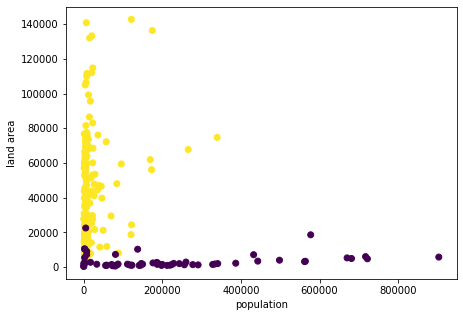

In [48]:
df = pd.read_csv('SSDSE.csv', skiprows=[1])
df=df[((df['prefecture']=='北海道') & (df['municipality'] !='札幌市'))|(df['prefecture']=='東京都')]
df.loc[df['prefecture'] == '北海道', 'prefecture'] = 1 # 北海道の市区町村ラベルを1
df.loc[df['prefecture'] == '東京都', 'prefecture'] = 0 # 東京都の市区町村ラベルを0
plt.figure(figsize=(7,5))
plt.xlabel('population')
plt.ylabel('land area')
plt.scatter(df['A1101'], df['B1101'],c=df['prefecture']);

上記のQ2で行ったロジスティック回帰のパラメータ推定を参考に、市区長村の人口総数$x_1$と面積$x_2$からその市区町村が北海道（1）か東京都（0）かを予測するような仮説関数$y=\frac{1}{1+e^{-(\theta_0+\theta_1x_1+\theta_2x_2)}}$のパラメータ$\theta_0, \theta_1, \theta_2$を学習し、学習されたパラメータを元に決定境界を可視化してください。

In [49]:
X=df[['A1101','B1101']].values # 入力: 人口総数と面積
y=df[['prefecture']].values # 出力: 北海道の市区町村（1）か東京都の市区町村（0）

X_norm=(X-np.mean(X, axis=0))/np.std(X, axis=0) # 標準化
X_norm=np.insert(X_norm, 0, np.ones((1,X.shape[0]), dtype=int), axis=1) # バイアス項の追加
X_norm #m行3列



###  ロジスティック回帰により、市区長村の人口総数と面積からその市区町村が北海道（1）か東京都（0）かを予測するような
###  仮説関数のパラメータを学習し、学習されたパラメータを元に決定境界を可視化

array([[ 1.00000000e+00,  1.35135853e+00,  1.10465871e+00],
       [ 1.00000000e+00,  3.54973845e-01, -2.77194404e-01],
       [ 1.00000000e+00,  1.86060721e+00,  1.32684912e+00],
       [ 1.00000000e+00,  1.24232857e-01, -7.95978305e-01],
       [ 1.00000000e+00,  7.20299908e-01,  3.28558866e+00],
       [ 1.00000000e+00,  6.82845998e-01,  9.18316750e-01],
       [ 1.00000000e+00,  3.50145991e-01,  3.49096914e+00],
       [ 1.00000000e+00, -4.27173087e-01,  1.37590994e+00],
       [ 1.00000000e+00,  9.61164865e-02,  4.77947378e-01],
       [ 1.00000000e+00, -2.18053692e-01,  4.46046705e-01],
       [ 1.00000000e+00, -3.34641524e-01, -1.05274609e-01],
       [ 1.00000000e+00,  7.06431932e-01,  7.34394406e-01],
       [ 1.00000000e+00, -2.36708022e-01,  1.37081602e+00],
       [ 1.00000000e+00, -3.29011333e-01, -1.69394325e-01],
       [ 1.00000000e+00, -3.86827998e-01,  1.70055182e+00],
       [ 1.00000000e+00,  3.46065140e-01, -4.56914264e-01],
       [ 1.00000000e+00, -4.11527520e-01

## 参考：scikit-learnでのロジスティック回帰
以下では、ロジスティック回帰（`LogisticRegression`）クラスをインポートしています。`train_test_split()`はデータセットを学習データとテストデータに分割するための関数、`accuracy_score()`はモデルの予測精度を評価するための関数です。

[LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

特徴量データ（`X_irist`）とラベルデータ（`y_iris`）からなるデータセットを学習データ（`X_train`, `y_train`）とテストデータ（`X_test`, `y_test`)に分割しています。ここでは、`train_test_split()`関数の`test_size`引数にデータセットの30%をテストデータとすることを指定しています。また、`stratify`引数にラベルデータを指定することで、学習データとテストデータ、それぞれでラベルの分布が同じになるようにしています。入力の特徴量は`StandardScaler`で標準化しています。

ロジスティック回帰クラスのインスタンスを作成し、**`fit`**`()`メソッドによりモデルを学習データに適合させています。そして、**`predict`**`()`メソッドを用いてテストデータのラベルを予測し、`accuracy_score()`関数などで実際のラベルデータ（`y_test`）と比較して予測精度の評価を行なっています。

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,  precision_score, recall_score, f1_score
from sklearn.datasets import load_iris

iris = load_iris()
X_all = iris.data[:,[2,3]] 
y_all = iris.target 
X = X_all[(y_all==1)|(y_all==2)] # 入力
y = y_all[(y_all==1)|(y_all==2)] # 出力

# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# 標準化
sc=StandardScaler() 
sc.fit(X_train)
norm_X_train=sc.transform(X_train) 
norm_X_test=sc.transform(X_test) 

model=LogisticRegression(solver='lbfgs',  multi_class='auto') # ロジスティック回帰モデル
# model=LogisticRegression() # sklearn0.19以前の場合
model.fit(norm_X_train, y_train) # モデルを学習データに適合

#print(model.coef_) # パラメータ重み
#print(model.intercept_) # バイアス重み

y_pred=model.predict(norm_X_test) # テストデータでラベルを予測

# print(model.predict_proba(norm_X_test)) # 各テストデータのラベル1or0であるかの確率の推定値

print(confusion_matrix(y_test, y_pred)) # 混同行列
print(accuracy_score(y_test, y_pred)) # accuracy
print(precision_score(y_test, y_pred)) # precision
print(recall_score(y_test, y_pred)) # recall
print(f1_score(y_test, y_pred))  # f値

[[15  0]
 [ 1 14]]
0.9666666666666667
0.9375
1.0
0.967741935483871


`LogisticRegression`ではデフォルトで正則化（$L_2$ノルム）が有効になっています。引数`C`は正則化項の係数の逆数になっています。

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,  precision_score, recall_score, f1_score
from sklearn.datasets import load_iris

iris = load_iris()
X_all = iris.data[:,[2,3]] 
y_all = iris.target 
X = X_all[(y_all==1)|(y_all==2)] # 入力
y = y_all[(y_all==1)|(y_all==2)] # 出力

# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# 標準化
sc=StandardScaler() 
sc.fit(X_train)
norm_X_train=sc.transform(X_train) 
norm_X_test=sc.transform(X_test) 

model=LogisticRegression(solver='lbfgs',  multi_class='auto', C=100) # ロジスティック回帰モデル、正則化の係数を指定
# model=LogisticRegression() # sklearn0.19以前の場合
model.fit(norm_X_train, y_train) # モデルを学習データに適合

#print(model.coef_) # パラメータ重み
#print(model.intercept_) # バイアス重み

y_pred=model.predict(norm_X_test) # テストデータでラベルを予測

# print(model.predict_proba(norm_X_test)) # 各テストデータのラベル1or0であるかの確率の推定値

print(confusion_matrix(y_test, y_pred)) # 混同行列
print(accuracy_score(y_test, y_pred)) # accuracy
print(precision_score(y_test, y_pred)) # precision
print(recall_score(y_test, y_pred)) # recall
print(f1_score(y_test, y_pred))  # f値

[[15  0]
 [ 1 14]]
0.9666666666666667
0.9375
1.0
0.967741935483871
